# Applications in the Financial Area

The financial market is the grandfather of all **time series** data. If you pay for proprietary high-tech stock exchange trading data, you could receive terabyte-sized data avalanches that can take days to process, even if you have ultra-high computing performance and access to embarrassingly parallel processing.

On the one hand, we have high-frequency trading (HFT) technology, which is already among the newest and most famous members of the financial community and trades based on information and insights resulting from **time series** analysis at the market level. microseconds. And on the other side, we have traditional trading companies - which analyze long-term **time series** for hours, days or even months -, which continue to have success in the markets, showing that **time series analysis ** for financial data can be accomplished in a myriad of successful ways and on timescales spanning many orders of magnitude, from milliseconds to months.

We'll work through a classic example of **time series** analysis for fun and profit: predicting tomorrow's stock returns according to the S&P 500 index.

## Obtaining and Exploring Financial Data

It can be very difficult to obtain financial data if you are looking for a specific product or temporal resolution. In these cases, you need to purchase the data. But historical stock price data is available from a variety of services, including:

- Yahoo Finance. Although Yahoo has discontinued maintenance of its historical data API, daily historical data is available for download (https://perma.cc/RQ6D-U4JX);
- newer companies such as AlphaVantage (https://alphavantage.co/) and Quandl (https://quandl.com) offer a combination of real-time and historical price information for stock market data;

We restrict our analysis to daily stock price data freely available on Yahoo. We downloaded the data for the S&P 500 covering the dates from 1990 to 2019. In the following code, we see which columns are available in the dataset we downloaded and plot the daily closing price to start exploring our data:

<br>

<div class="alert alert-block alert-info">
<b>Note:</b> As previously mentioned about the difficulty in obtaining the data, we will only use stock data from the period from 07/17/2018 to 07/16/2019
</div>

In [1]:
# Standard libs
import numpy as np
import pandas as pd

# Dataviz libs
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/Users/dellacorte/py-projects/data-science/time-series-pocket-reference/datasets/sp500.csv", sep=";")

In [3]:
df.shape

(251, 7)

In [4]:
df.head()

,date,open,high,low,close,adj_close,volume
0,"Jul 16, 2019","3,012.13","3,015.02","3,001.15","3,004.04","3,004.04","1,742,567,428"
1,"Jul 15, 2019","3,017.80","3,017.80","3,008.77","3,014.30","3,014.30","2,874,970,000"
2,"Jul 12, 2019","3,003.36","3,013.92","3,001.87","3,013.77","3,013.77","2,974,960,000"
3,"Jul 11, 2019","2,999.62","3,002.33","2,988.80","2,999.91","2,999.91","3,154,620,000"
4,"Jul 10, 2019","2,989.30","3,002.98","2,984.62","2,993.07","2,993.07","3,154,240,000"


In [5]:
df.dtypes

date         object
open         object
high         object
low          object
close        object
adj_close    object
volume       object
dtype: object

In [6]:
# Convert 'date' column to datetime
df["date"] = pd.to_datetime(df["date"], format="%b %d, %Y")

# List of numeric columns
numeric_cols = ["open", "high", "low", "close", "adj_close", "volume"]

# Remove commas and convert to numeric
df[numeric_cols] = df[numeric_cols].replace(",", "", regex=True).apply(pd.to_numeric)

# Set date as index
df.set_index("date", inplace=True)

# Check the result
print(df.dtypes)

open         float64
high         float64
low          float64
close        float64
adj_close    float64
volume         int64
dtype: object


In [7]:
print(df.isna().sum())

open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64


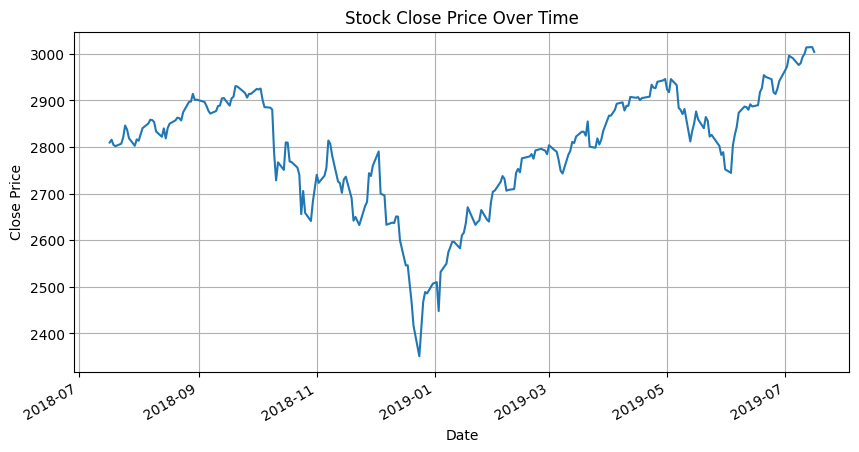

In [8]:
# Plot the close price
df["close"].plot(figsize=(10, 5))
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.title("Stock Close Price Over Time")
plt.grid(True)
plt.show()